In [8]:
import sys 
sys.path.append("../data/")
sys.path.append("../artifacts/")
from load_EEGs_1c import EEGDataset1c
from synthetic_artifacts_1c import SyntheticArtifiacts1c 
import stacklineplot
import torch
import torch.utils.data as data

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

### Real EEGs 

In [3]:
files_csv = "../data/dataset_csv/sample_file.csv"
dataset = EEGDataset1c(files_csv, max_num_examples=100, length=5000)

#### Single Channel Graph

/mnt/home2/dlongo/.conda/envs/mne-2/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


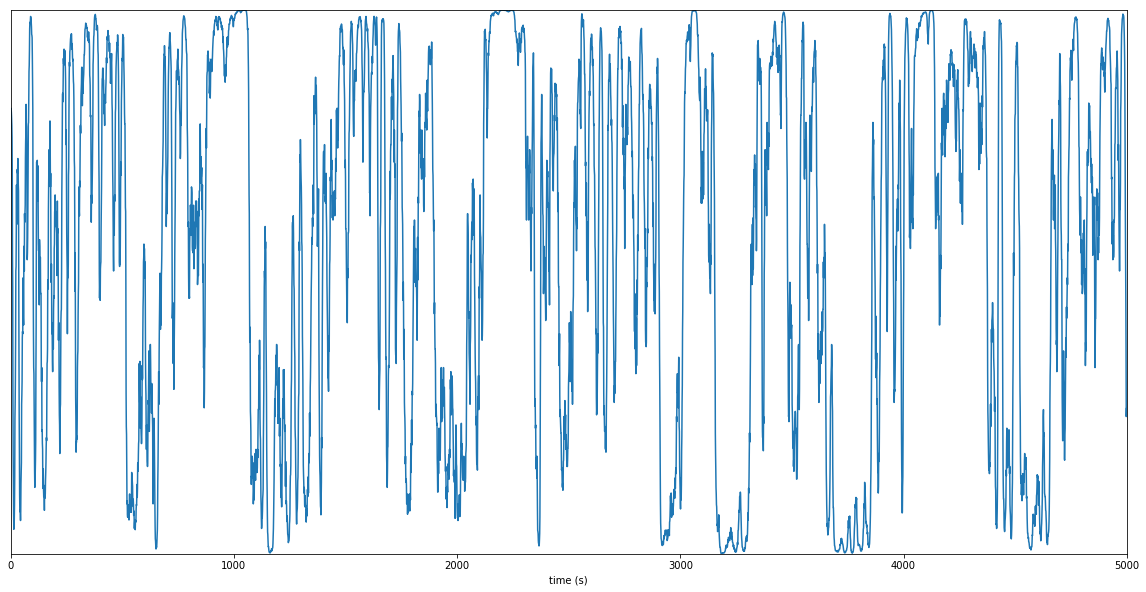

In [4]:
sample = dataset[2]
sample = sample.numpy().T
stacklineplot.stackplot(sample)

#### Batch Graph

In [5]:
samples_data_loader = data.DataLoader(dataset=dataset,
                                  shuffle=True,
                                  batch_size=16)
samples_data_loader = iter(samples_data_loader)

In [7]:
sample_batch.shape

torch.Size([16, 5000])

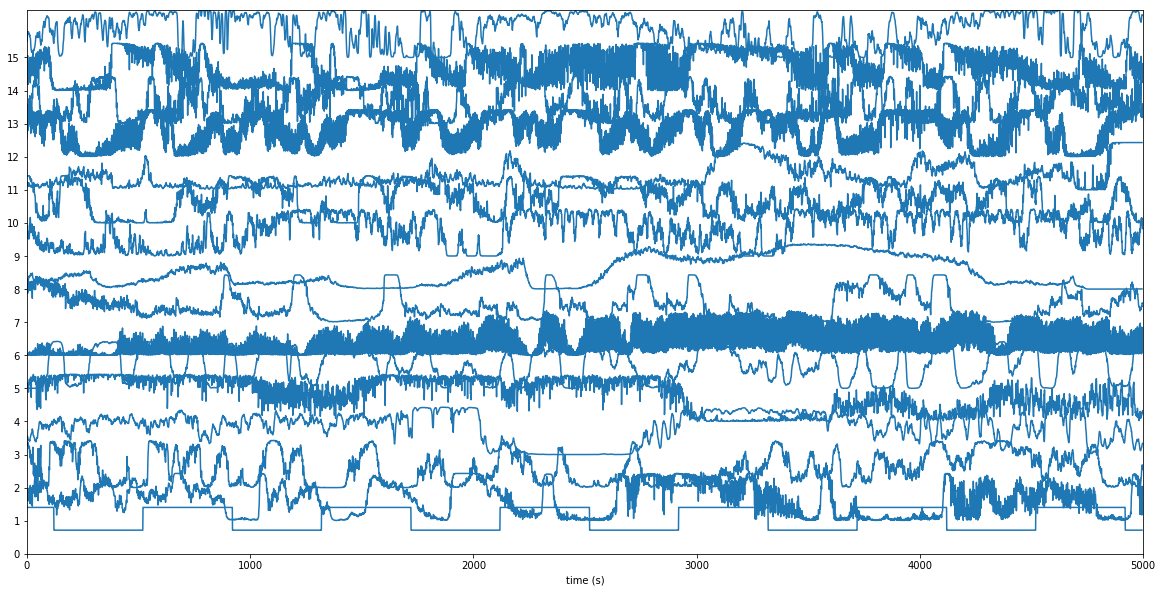

In [6]:
sample_batch = next(samples_data_loader)
sample_batch = sample_batch.view(sample_batch.shape[0], sample_batch.shape[1])#.numpy()
stacklineplot.stackplot(sample_batch)

In [8]:
print(torch.abs(sample_batch[1]).mean())
min(sample_batch[0])

tensor(0.5003)


tensor(0.0004)

### Artifacts

Some 60hz noise

In [24]:
artifacts_dataset = SyntheticArtifiacts1c(16*10, length=5000)

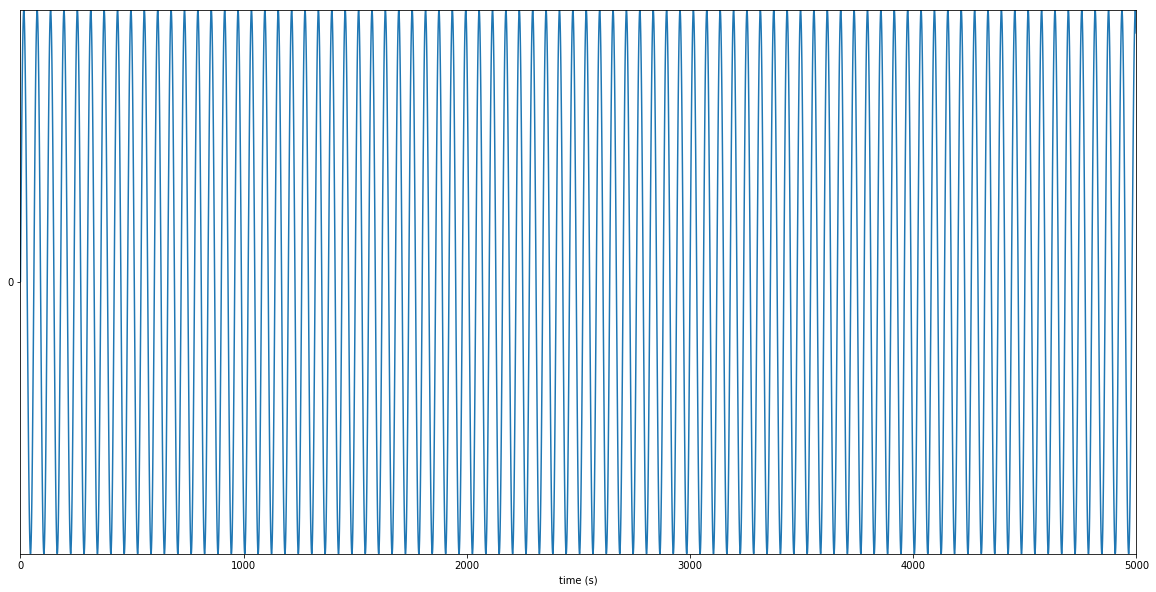

In [25]:
artifact = artifacts_dataset[0]
artifact = artifact.numpy().T
stacklineplot.stackplot(artifact)

In [27]:
artifacts_data_loader = data.DataLoader(dataset=artifacts_dataset,
                                  shuffle=True,
                                  batch_size=16)
artifacts_data_loader = iter(artifacts_data_loader)

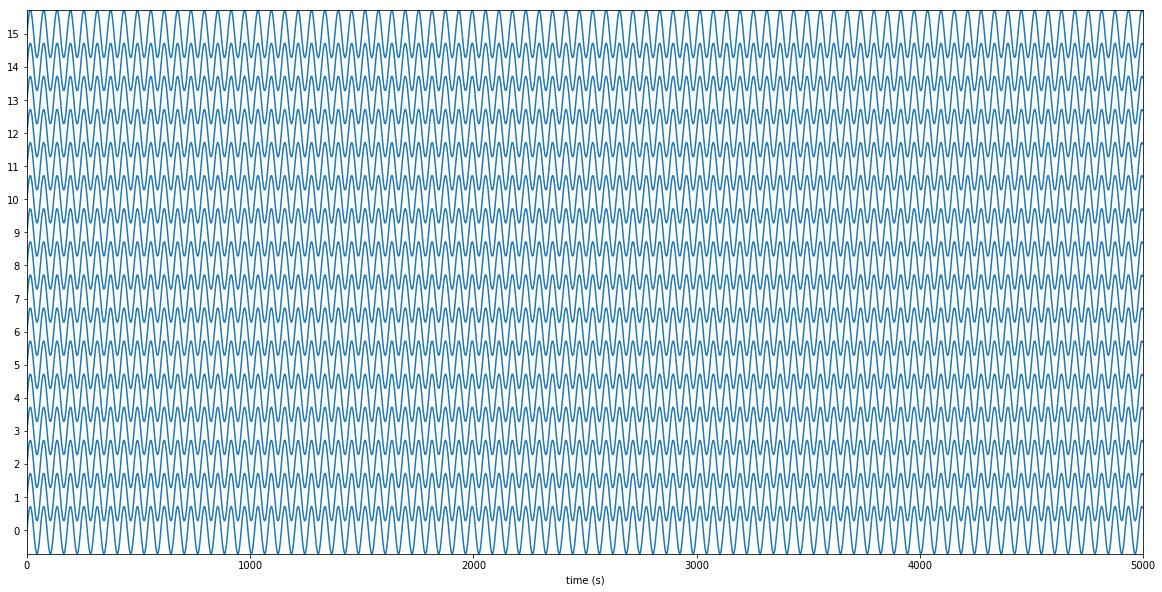

In [18]:
artifact_batch = next(artifacts_data_loader)
artifact_batch = artifact_batch.view(artifact_batch.shape[0], artifact_batch.shape[1]).numpy()
stacklineplot.stackplot(artifact_batch)

### Artifiacts Superimposed on EEGs

In [37]:
artifact_batch = next(artifacts_data_loader)
artifact_batch = artifact_batch.view(artifact_batch.shape[0], artifact_batch.shape[1]).numpy()
sample_batch = next(samples_data_loader)
sample_batch = sample_batch.view(sample_batch.shape[0], sample_batch.shape[1]).numpy()

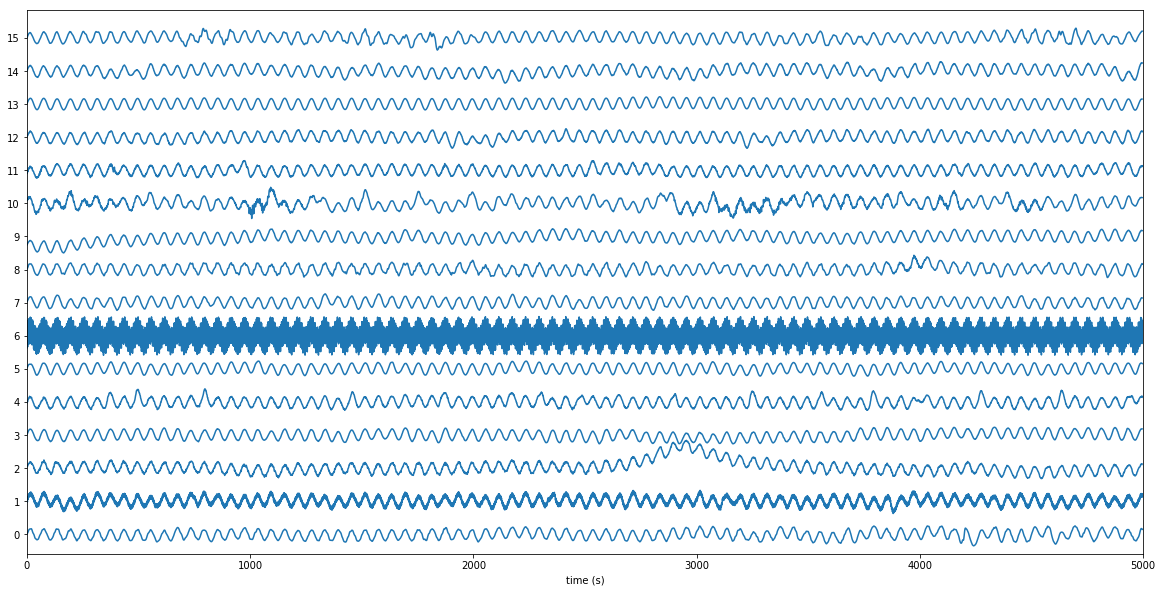

In [38]:
a = 1e3
stacklineplot.stackplot(artifact_batch * a  + sample_batch)

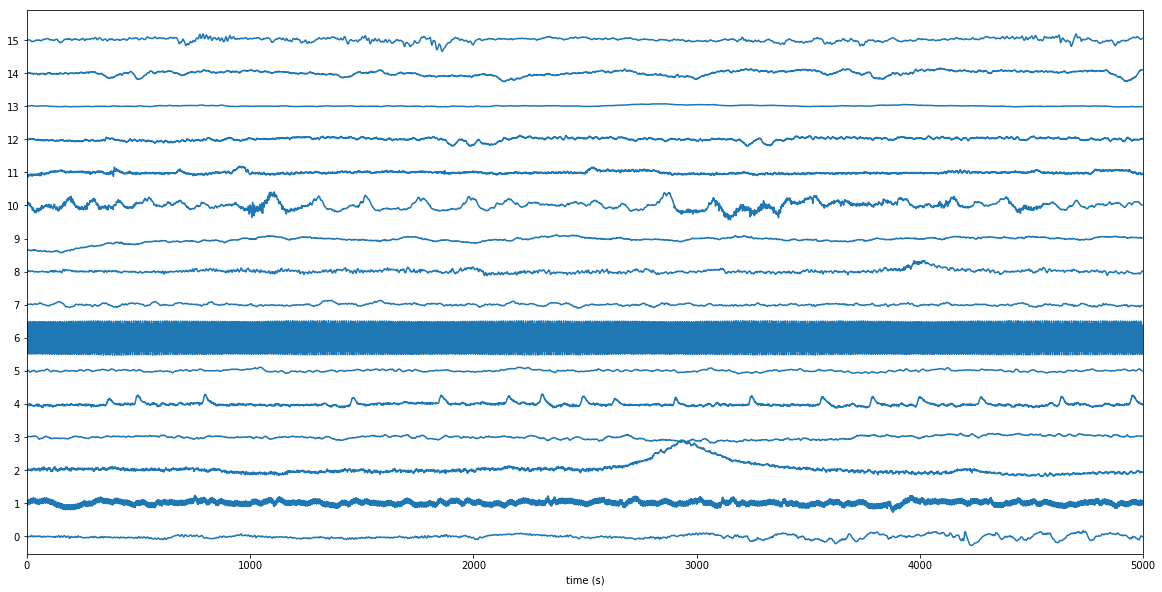

In [39]:
stacklineplot.stackplot(sample_batch)